In [1]:
# Import the random module.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import the requests library.
import requests

In [3]:
# Import the API key.
from config import weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
len(coordinates)

1500

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []

In [11]:
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [12]:
# Create counters.
record_count = 1
set_count = 1

In [13]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | kirakira
Processing Record 3 of Set 1 | port hardy
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | grindavik
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | sibu
Processing Record 8 of Set 1 | vila velha
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | upernavik
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | korem
Processing Record 13 of Set 1 | vanimo
Processing Record 14 of Set 1 | mataura
Processing Record 15 of Set 1 | lagoa
Processing Record 16 of Set 1 | saint anthony
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | hrinova
Processing Record 19 of Set 1 | mocuba
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | klaksvik
Processing Record 22 of Set 1 | cherskiy
Processing Record 23 of Set 1 | tuatapere
Processing Record 24 of Set 1 | boa vista
Processing Record 25 o

Processing Record 38 of Set 4 | derzhavinsk
Processing Record 39 of Set 4 | kodiak
Processing Record 40 of Set 4 | kudahuvadhoo
Processing Record 41 of Set 4 | makakilo city
Processing Record 42 of Set 4 | turan
Processing Record 43 of Set 4 | korla
Processing Record 44 of Set 4 | del rio
Processing Record 45 of Set 4 | taoudenni
Processing Record 46 of Set 4 | kapaa
Processing Record 47 of Set 4 | acapulco
Processing Record 48 of Set 4 | port hawkesbury
Processing Record 49 of Set 4 | champerico
Processing Record 50 of Set 4 | dingle
Processing Record 1 of Set 5 | cap-aux-meules
Processing Record 2 of Set 5 | kulhudhuffushi
Processing Record 3 of Set 5 | victoria
Processing Record 4 of Set 5 | bathsheba
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 5 | lindi
Processing Record 7 of Set 5 | piripiri
Processing Record 8 of Set 5 | nanortalik
Processing Record 9 of Set 5 | labuan
Processing Record 10 of Set 5 | la ronge
Processing Record 11 of Set 5 | mount gambier
Proces

Processing Record 27 of Set 8 | half moon bay
Processing Record 28 of Set 8 | soyo
Processing Record 29 of Set 8 | bilibino
Processing Record 30 of Set 8 | pingtung
Processing Record 31 of Set 8 | saint-augustin
Processing Record 32 of Set 8 | lubango
Processing Record 33 of Set 8 | walvis bay
Processing Record 34 of Set 8 | paamiut
Processing Record 35 of Set 8 | buchanan
Processing Record 36 of Set 8 | oksfjord
Processing Record 37 of Set 8 | rio gallegos
Processing Record 38 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 39 of Set 8 | millport
Processing Record 40 of Set 8 | maniwaki
Processing Record 41 of Set 8 | qax
Processing Record 42 of Set 8 | xiongshi
City not found. Skipping...
Processing Record 43 of Set 8 | jijiang
Processing Record 44 of Set 8 | ryotsu
Processing Record 45 of Set 8 | jimeta
Processing Record 46 of Set 8 | nang rong
Processing Record 47 of Set 8 | pringsewu
Processing Record 48 of Set 8 | kamenskoye
City not found. Skipping...
Proc

Processing Record 18 of Set 12 | havoysund
Processing Record 19 of Set 12 | nizhniy baskunchak
Processing Record 20 of Set 12 | burnie
Processing Record 21 of Set 12 | meulaboh
Processing Record 22 of Set 12 | storsteinnes
Processing Record 23 of Set 12 | pavelets
Processing Record 24 of Set 12 | pendencias
Processing Record 25 of Set 12 | honiara
Processing Record 26 of Set 12 | methoni
Processing Record 27 of Set 12 | garowe
Processing Record 28 of Set 12 | ribeira brava
Processing Record 29 of Set 12 | kipini
Processing Record 30 of Set 12 | jacareacanga
Processing Record 31 of Set 12 | meyungs
City not found. Skipping...
Processing Record 32 of Set 12 | znamenka
Processing Record 33 of Set 12 | saint-joseph
Processing Record 34 of Set 12 | miyako
Processing Record 35 of Set 12 | ciechanow
Processing Record 36 of Set 12 | esperance
Processing Record 37 of Set 12 | edendale
Processing Record 38 of Set 12 | port lincoln
Processing Record 39 of Set 12 | kamien pomorski
Processing Recor

In [36]:
len(city_data)

560

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dikson,73.5069,80.5464,-29.51,82,3,13.04,RU,2021-03-05 00:24:43
1,Kirakira,-10.4544,161.9205,80.91,77,100,12.19,SB,2021-03-05 00:24:44
2,Port Hardy,50.6996,-127.4199,46.40,76,75,6.91,CA,2021-03-05 00:24:46
3,Jamestown,42.0970,-79.2353,24.01,91,20,11.30,US,2021-03-05 00:20:58
4,Grindavik,63.8424,-22.4338,39.20,93,90,4.61,IS,2021-03-05 00:24:47
5,Saint-Pierre,-21.3393,55.4781,77.00,78,40,5.75,RE,2021-03-05 00:24:48
6,Sibu,2.3000,111.8167,75.20,94,20,4.61,MY,2021-03-05 00:24:49
7,Vila Velha,-20.3297,-40.2925,78.01,78,0,4.61,BR,2021-03-05 00:22:14
8,Punta Arenas,-53.1500,-70.9167,57.20,44,90,4.61,CL,2021-03-05 00:20:36
9,Upernavik,72.7868,-56.1549,-14.39,84,21,15.37,GL,2021-03-05 00:24:52


In [16]:
# Re-order columns in city_data_df
re_order_col =["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]


In [17]:
city_data_df = city_data_df[re_order_col]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-03-05 00:24:43,73.5069,80.5464,-29.51,82,3,13.04
1,Kirakira,SB,2021-03-05 00:24:44,-10.4544,161.9205,80.91,77,100,12.19
2,Port Hardy,CA,2021-03-05 00:24:46,50.6996,-127.4199,46.40,76,75,6.91
3,Jamestown,US,2021-03-05 00:20:58,42.0970,-79.2353,24.01,91,20,11.30
4,Grindavik,IS,2021-03-05 00:24:47,63.8424,-22.4338,39.20,93,90,4.61
...,...,...,...,...,...,...,...,...,...
555,Ambatondrazaka,MG,2021-03-05 00:34:24,-17.8333,48.4167,66.52,93,84,1.83
556,Chivilcoy,AR,2021-03-05 00:34:25,-34.8957,-60.0167,73.99,90,37,1.99
557,Qui Nhon,VN,2021-03-05 00:31:12,13.7667,109.2333,76.71,81,6,3.62
558,Swidnica,PL,2021-03-05 00:34:26,50.8438,16.4886,33.01,88,100,8.01


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

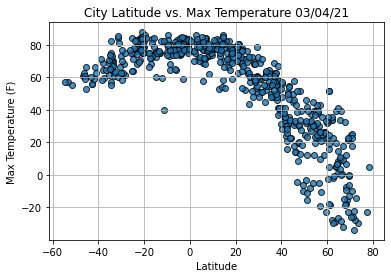

In [32]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

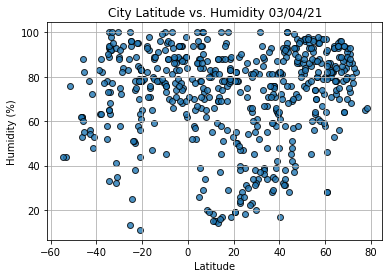

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

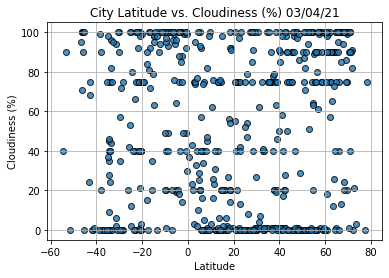

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

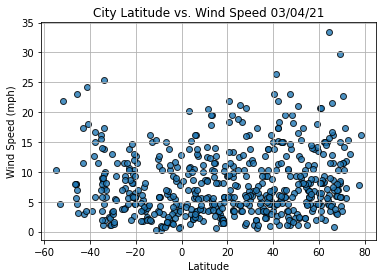

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [52]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

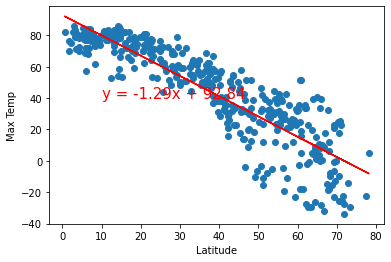

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere\
                        for Maximum Temperature", "Max Temp",(10,40))

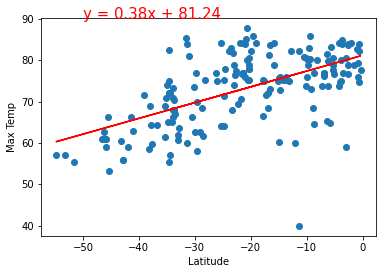

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\
                        for Maximum Temperature", "Max Temp",(-50,90))

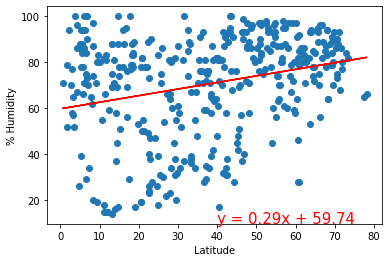

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for % Humidity', '% Humidity',(40,10))

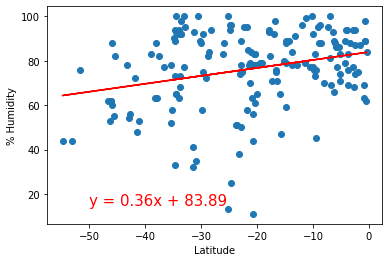

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\
                        for % Humidity", "% Humidity",(-50,15))

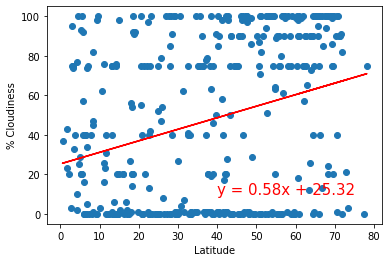

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for % Cloudiness', '% Cloudiness',(40,10))

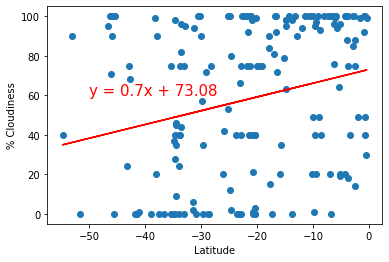

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\
                        for % Cloudiness', '% Cloudiness',(-50,60))

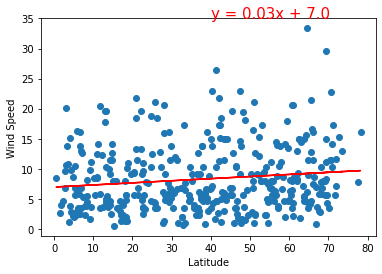

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\
                        for Wind Speed', 'Wind Speed',(40,35))

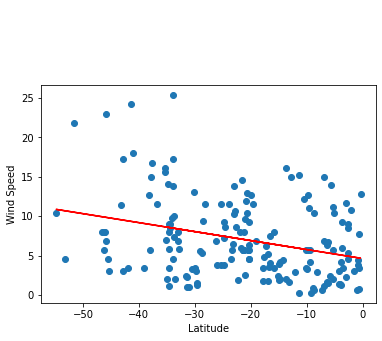

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere\
                        for Wind Speed", "Wind Speed",(-50,35))